Data Set Link
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [1]:
import pandas as pd

# Define the path to the Excel file
file_path = r'C:\Users\david\OneDrive\Documents\GitHub\Research\UCI_ML_HeartDisease Research\heart.xlsx'

# Use pandas to read the Excel file
heart_data = pd.read_excel(file_path)

# Displaying the first few rows of the dataset for initial exploration
heart_data.head(), heart_data.info(), heart_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
 0   40   M           ATA        140          289          0     Normal    172   
 1   49   F           NAP        160          180          0     Normal    156   
 2   37   M           ATA        130          283          0         ST     98   
 3   48   F           ASY        138          214          0     Normal    108   
 4   54   M           NAP        150          195          0     Normal    122   
 
   ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
 0              N      0.0       Up             0  
 1              N      1.0     Flat             1  
 2              N      0.0       Up             0  
 3              Y      1.5     Flat             1  
 4              N      0.0       Up             0  ,
 None,
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
 count  918.000000  918.000000   918.000000  918.000000  918.000000   
 mean    53.510893  132.396514   198.799564 

In [2]:
# Data Exploration and Cleaning
# Identifying records with zero values in 'Cholesterol' and 'RestingBP'
zero_cholesterol = heart_data[heart_data['Cholesterol'] == 0]
zero_restingBP = heart_data[heart_data['RestingBP'] == 0]

# Counting the number of records with zero values in these columns
zero_cholesterol_count = zero_cholesterol.shape[0]
zero_restingBP_count = zero_restingBP.shape[0]

zero_cholesterol_count, zero_restingBP_count, zero_cholesterol.head(), zero_restingBP.head()


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Removing the record with zero RestingBP
heart_data_cleaned = heart_data[heart_data['RestingBP'] != 0]

# Separating the data into two sets: one with zero cholesterol and one without
data_with_cholesterol = heart_data_cleaned[heart_data_cleaned['Cholesterol'] != 0]
data_without_cholesterol = heart_data_cleaned[heart_data_cleaned['Cholesterol'] == 0]

# Preparing the data for model-based imputation
# We use other features to predict 'Cholesterol'
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
X = pd.get_dummies(data_with_cholesterol[features], drop_first=True)
y = data_with_cholesterol['Cholesterol']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluating the model's performance on the test set
rf_model.score(X_test, y_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating and training the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Calculating R-squared and Mean Squared Error for the model
r_squared = lr_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

r_squared, mse

# Calculating the median of the Cholesterol column
median_cholesterol = data_with_cholesterol['Cholesterol'].median()

# Imputing the zero values in the Cholesterol column with the median value
heart_data_cleaned['Cholesterol'] = heart_data_cleaned['Cholesterol'].replace(0, median_cholesterol)

# Checking if the imputation was successful
imputed_data_check = heart_data_cleaned[heart_data_cleaned['Cholesterol'] == median_cholesterol].head()

# Displaying the first few rows of the cleaned dataset
cleaned_data_head = heart_data_cleaned.head()
median_cholesterol, cleaned_data_head, imputed_data_check


C:\Users\david\AppData\Local\Temp\ipykernel_26688\3402077392.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data_cleaned['Cholesterol'] = heart_data_cleaned['Cholesterol'].replace(0, median_cholesterol)


(237.0,
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
 0   40   M           ATA        140          289          0     Normal    172   
 1   49   F           NAP        160          180          0     Normal    156   
 2   37   M           ATA        130          283          0         ST     98   
 3   48   F           ASY        138          214          0     Normal    108   
 4   54   M           NAP        150          195          0     Normal    122   
 
   ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
 0              N      0.0       Up             0  
 1              N      1.0     Flat             1  
 2              N      0.0       Up             0  
 3              Y      1.5     Flat             1  
 4              N      0.0       Up             0  ,
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
 6     45   F           ATA        130          237          0     Normal   
 187   41   M           ASY    

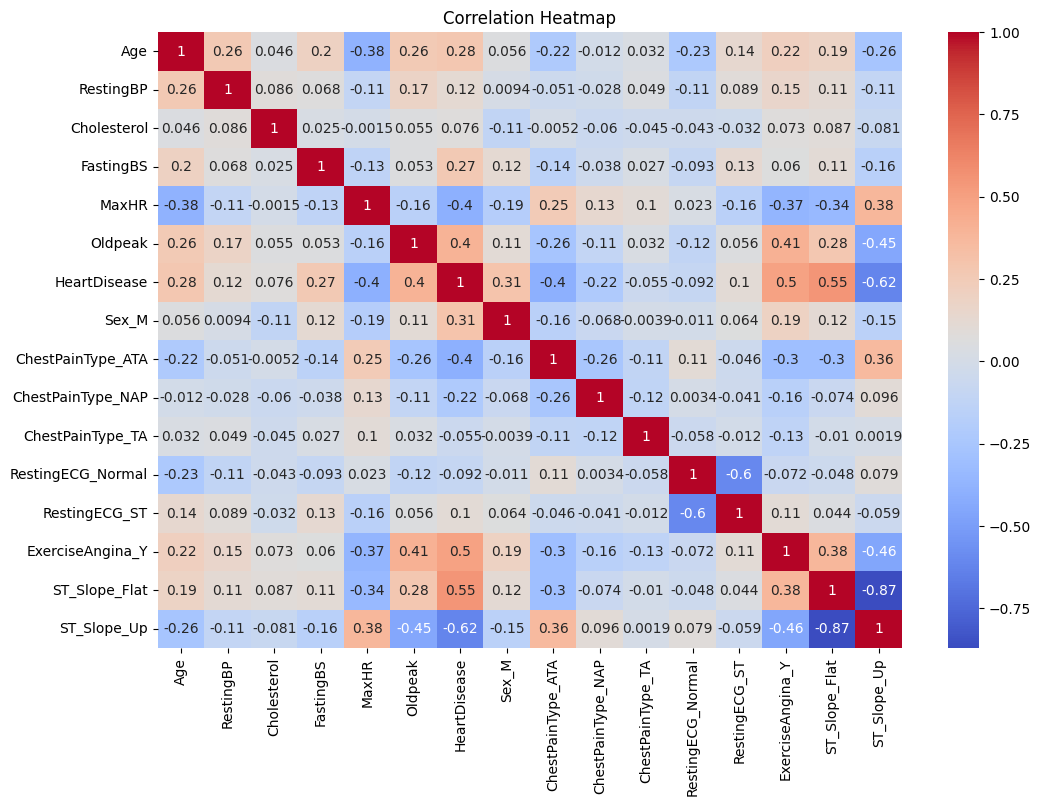

HeartDisease         1.000000
ST_Slope_Flat        0.553700
ExerciseAngina_Y     0.495490
Oldpeak              0.403638
Sex_M                0.305118
Age                  0.282012
FastingBS            0.267994
RestingBP            0.117990
RestingECG_ST        0.103067
Cholesterol          0.076262
ChestPainType_TA    -0.054591
RestingECG_Normal   -0.092452
ChestPainType_NAP   -0.215311
MaxHR               -0.401410
ChestPainType_ATA   -0.401680
ST_Slope_Up         -0.621843
Name: HeartDisease, dtype: float64

In [3]:
# Feature Engineering
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding categorical variables for correlation analysis
heart_data_encoded = pd.get_dummies(heart_data_cleaned, drop_first=True)

# Calculating correlations
correlation_matrix = heart_data_encoded.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Displaying correlations of features with the target variable 'HeartDisease'
correlation_with_target = correlation_matrix['HeartDisease'].sort_values(ascending=False)
correlation_with_target


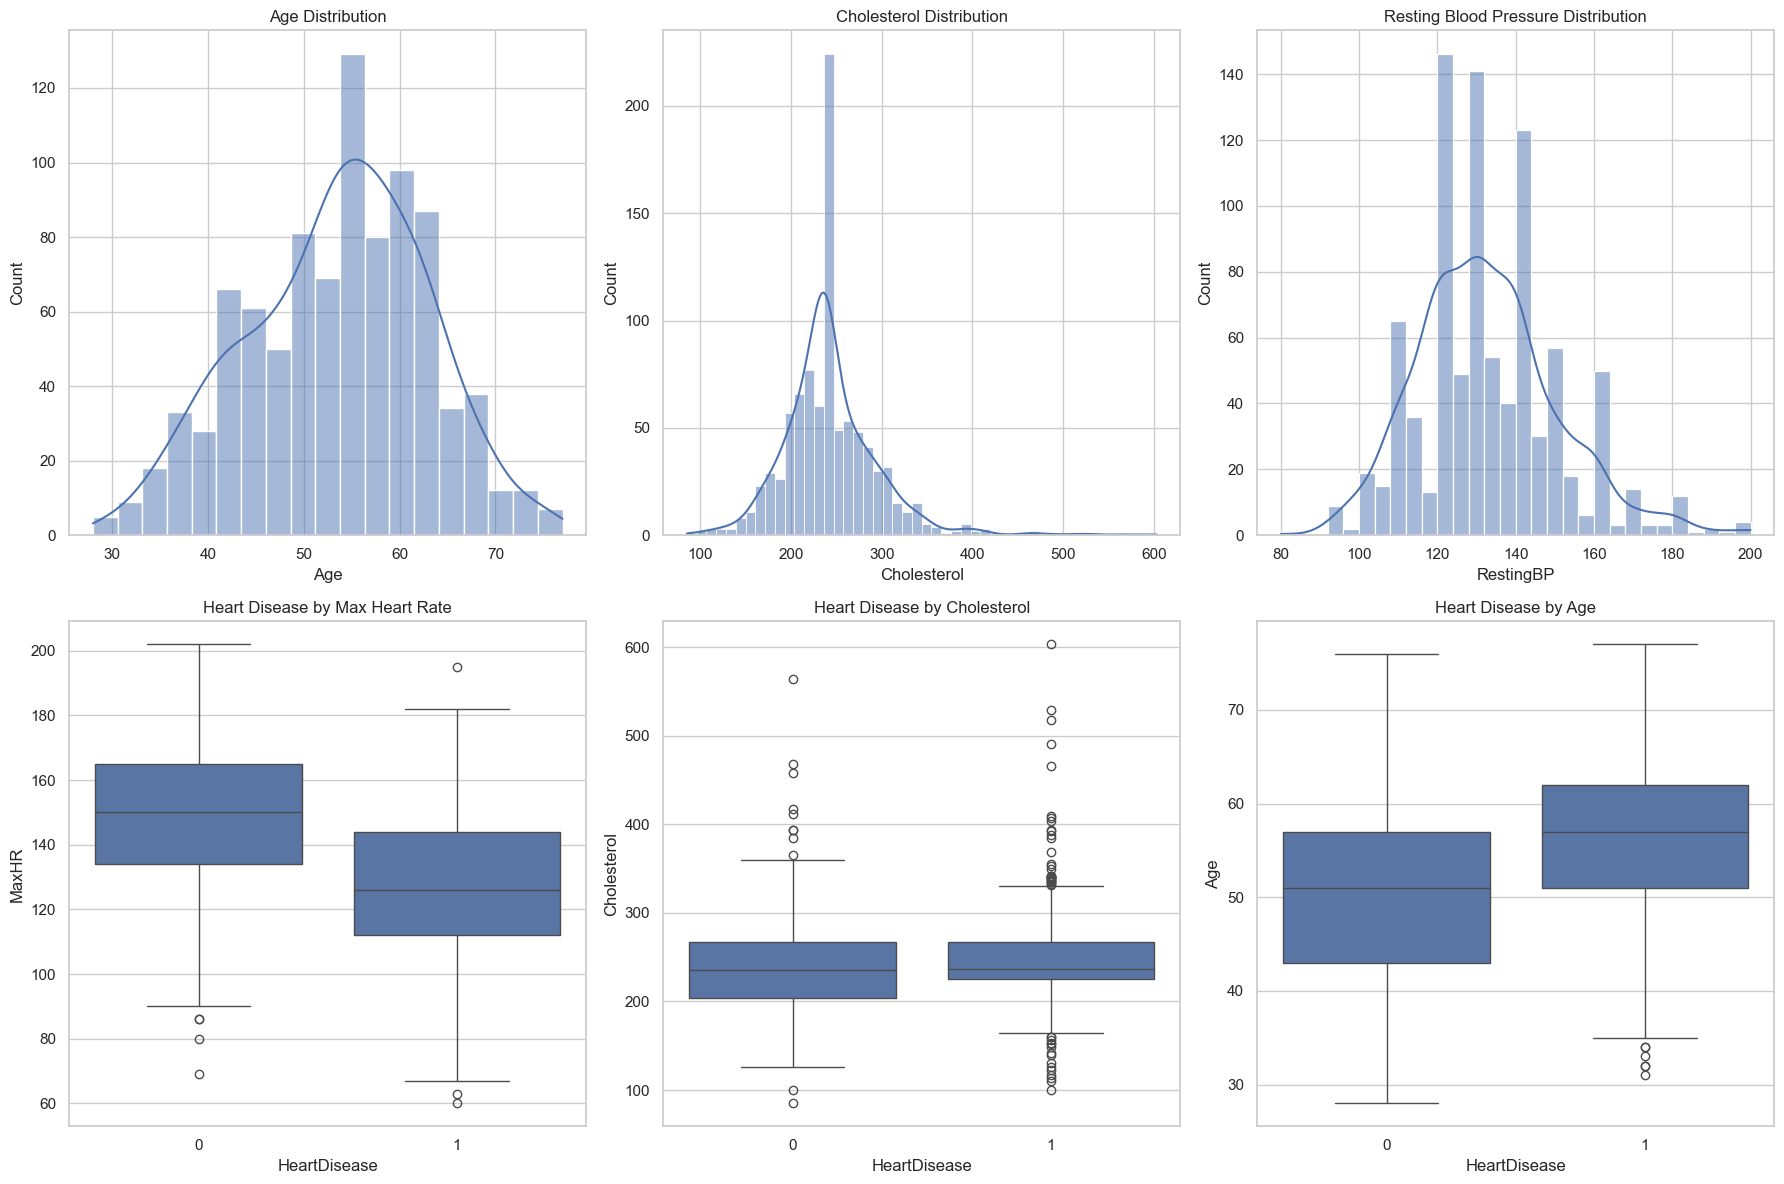

In [4]:
# Data Visualizations for Insights

# Setting the style for the plots
sns.set(style="whitegrid")

# Visualizing the distribution of key features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Age Distribution
sns.histplot(heart_data_cleaned['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Cholesterol Distribution
sns.histplot(heart_data_cleaned['Cholesterol'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Cholesterol Distribution')

# Resting Blood Pressure Distribution
sns.histplot(heart_data_cleaned['RestingBP'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Resting Blood Pressure Distribution')

# Heart Disease by Max Heart Rate
sns.boxplot(x='HeartDisease', y='MaxHR', data=heart_data_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Heart Disease by Max Heart Rate')

# Heart Disease by Cholesterol
sns.boxplot(x='HeartDisease', y='Cholesterol', data=heart_data_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Heart Disease by Cholesterol')

# Heart Disease by Age
sns.boxplot(x='HeartDisease', y='Age', data=heart_data_cleaned, ax=axes[1, 2])
axes[1, 2].set_title('Heart Disease by Age')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating the features (X) and the target variable (y)
X = heart_data_encoded.drop('HeartDisease', axis=1)
y = heart_data_encoded['HeartDisease']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features: important for models like Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirming the shape of the training and testing sets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb

# Initializing the models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Training Logistic Regression
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

# Training Random Forest
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

# Training XGBoost
xgboost_model.fit(X_train, y_train)
xgb_pred = xgboost_model.predict(X_test)

# Evaluating the models
models = [log_reg, random_forest, xgboost_model]
predictions = [log_reg_pred, rf_pred, xgb_pred]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Dictionary to store evaluation metrics
evaluation_metrics = {}

for model, pred, name in zip(models, predictions, model_names):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    evaluation_metrics[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'ROC-AUC': roc_auc}

print(evaluation_metrics)

# Training Logistic Regression and evaluating its performance
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

# Evaluating Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_roc_auc = roc_auc_score(y_test, log_reg_pred)

log_reg_metrics = {
    'Accuracy': log_reg_accuracy,
    'Precision': log_reg_precision,
    'Recall': log_reg_recall,
    'ROC-AUC': log_reg_roc_auc
}

print(log_reg_metrics)



{'Logistic Regression': {'Accuracy': 0.8695652173913043, 'Precision': 0.9230769230769231, 'Recall': 0.8571428571428571, 'ROC-AUC': 0.873015873015873}, 'Random Forest': {'Accuracy': 0.8804347826086957, 'Precision': 0.8947368421052632, 'Recall': 0.9107142857142857, 'ROC-AUC': 0.8720238095238094}, 'XGBoost': {'Accuracy': 0.8695652173913043, 'Precision': 0.9, 'Recall': 0.8839285714285714, 'ROC-AUC': 0.8655753968253967}}
{'Accuracy': 0.8695652173913043, 'Precision': 0.9230769230769231, 'Recall': 0.8571428571428571, 'ROC-AUC': 0.873015873015873}


In [6]:
from sklearn.model_selection import GridSearchCV

# Parameters for Logistic Regression to be tuned
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}

# Grid search with focus on precision
grid_search_log_reg = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid_log_reg,
    scoring='precision',
    cv=5,
    verbose=2
)

# Performing grid search
grid_search_log_reg.fit(X_train_scaled, y_train)

# Best parameters and best precision score
best_params_log_reg = grid_search_log_reg.best_params_
best_precision_log_reg = grid_search_log_reg.best_score_

best_params_log_reg, best_precision_log_reg

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solv

({'C': 0.01, 'solver': 'liblinear'}, 0.8610542226718698)

In [7]:
# Retraining Logistic Regression with optimized parameters
optimized_log_reg = LogisticRegression(C=0.01, solver='liblinear', max_iter=1000, random_state=42)
optimized_log_reg.fit(X_train_scaled, y_train)
optimized_log_reg_pred = optimized_log_reg.predict(X_test_scaled)

# Evaluating the optimized model
optimized_log_reg_accuracy = accuracy_score(y_test, optimized_log_reg_pred)
optimized_log_reg_precision = precision_score(y_test, optimized_log_reg_pred)
optimized_log_reg_recall = recall_score(y_test, optimized_log_reg_pred)
optimized_log_reg_roc_auc = roc_auc_score(y_test, optimized_log_reg_pred)

optimized_log_reg_metrics = {
    'Accuracy': optimized_log_reg_accuracy,
    'Precision': optimized_log_reg_precision,
    'Recall': optimized_log_reg_recall,
    'ROC-AUC': optimized_log_reg_roc_auc
}

optimized_log_reg_metrics

{'Accuracy': 0.8641304347826086,
 'Precision': 0.9223300970873787,
 'Recall': 0.8482142857142857,
 'ROC-AUC': 0.8685515873015872}

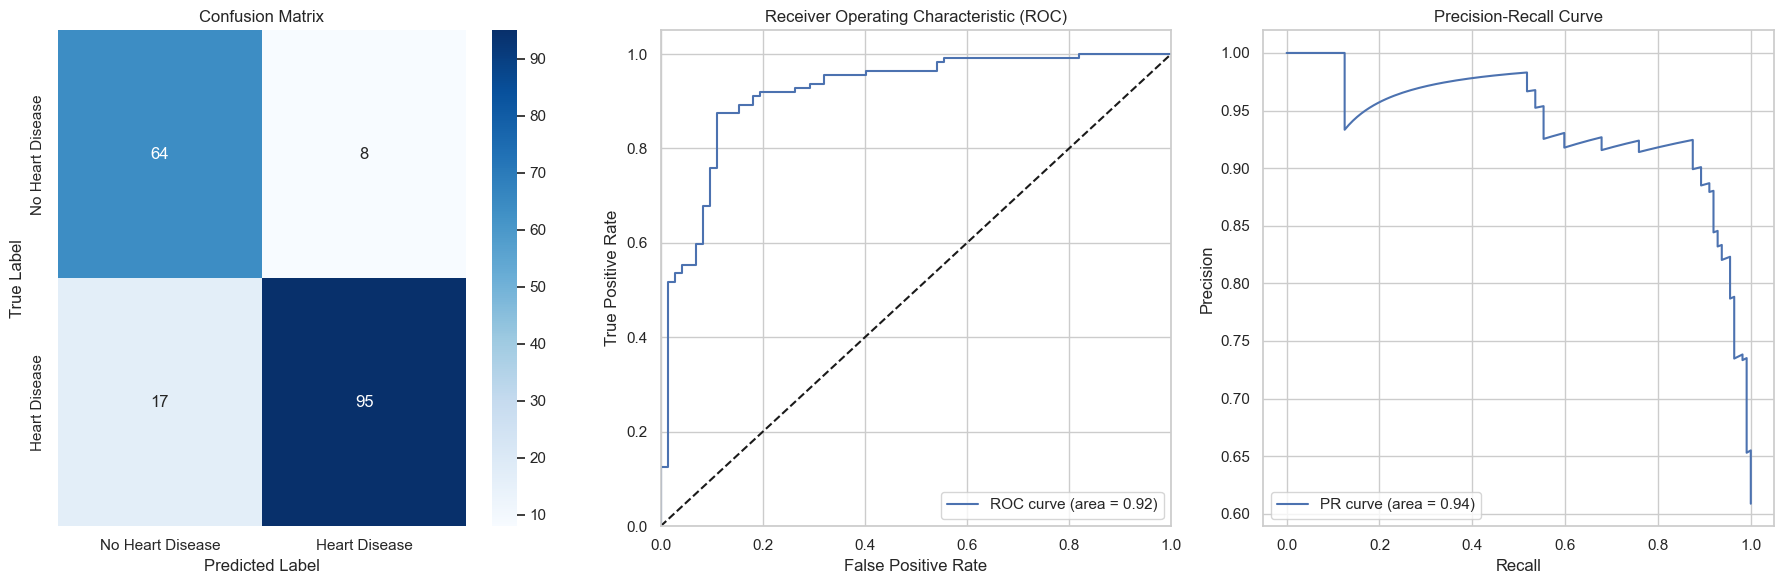

In [8]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import numpy as np

# Generating predictions and probabilities
optimized_log_reg_probs = optimized_log_reg.predict_proba(X_test_scaled)[:, 1]

# Creating a confusion matrix
cm = confusion_matrix(y_test, optimized_log_reg_pred)

# ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, optimized_log_reg_probs)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, optimized_log_reg_probs)
pr_auc = auc(recall, precision)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_xticklabels(['No Heart Disease', 'Heart Disease'])
axes[0].set_yticklabels(['No Heart Disease', 'Heart Disease'])

# ROC Curve
axes[1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC)')
axes[1].legend(loc="lower right")

# Precision-Recall Curve
axes[2].plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve')
axes[2].legend(loc="lower left")

plt.tight_layout()
plt.show()